In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* id 고유 id
* hour 시간
* temperature 기온
* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)
* humidity 습도
* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone 오존
* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count 시간에 따른 따릉이 대여 수


[대회링크](https://dacon.io/competitions/open/235576/data)

*  평가 산식 : RMSE

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/submission.csv')

## 데이터 둘러보기


In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [ ]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
train.shape, test.shape

((1459, 11), (715, 10))

## 시각화

In [ ]:
# id값 처리
train = train.drop('id',axis=1)
test_id = test.pop('id')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [ ]:
train_copy = train.copy()

In [ ]:
df = train_copy[['hour_bef_precipitation','count']]
train_copy = train_copy.drop(['count','hour_bef_precipitation'],axis=1)

In [ ]:
# train_copy = train_copy.drop('hour_bef_precipitation',axis=1)

In [ ]:
# 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_copy.head()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,4.8,7.0,2000.0,0.057,27.0,11.0


박스플롯

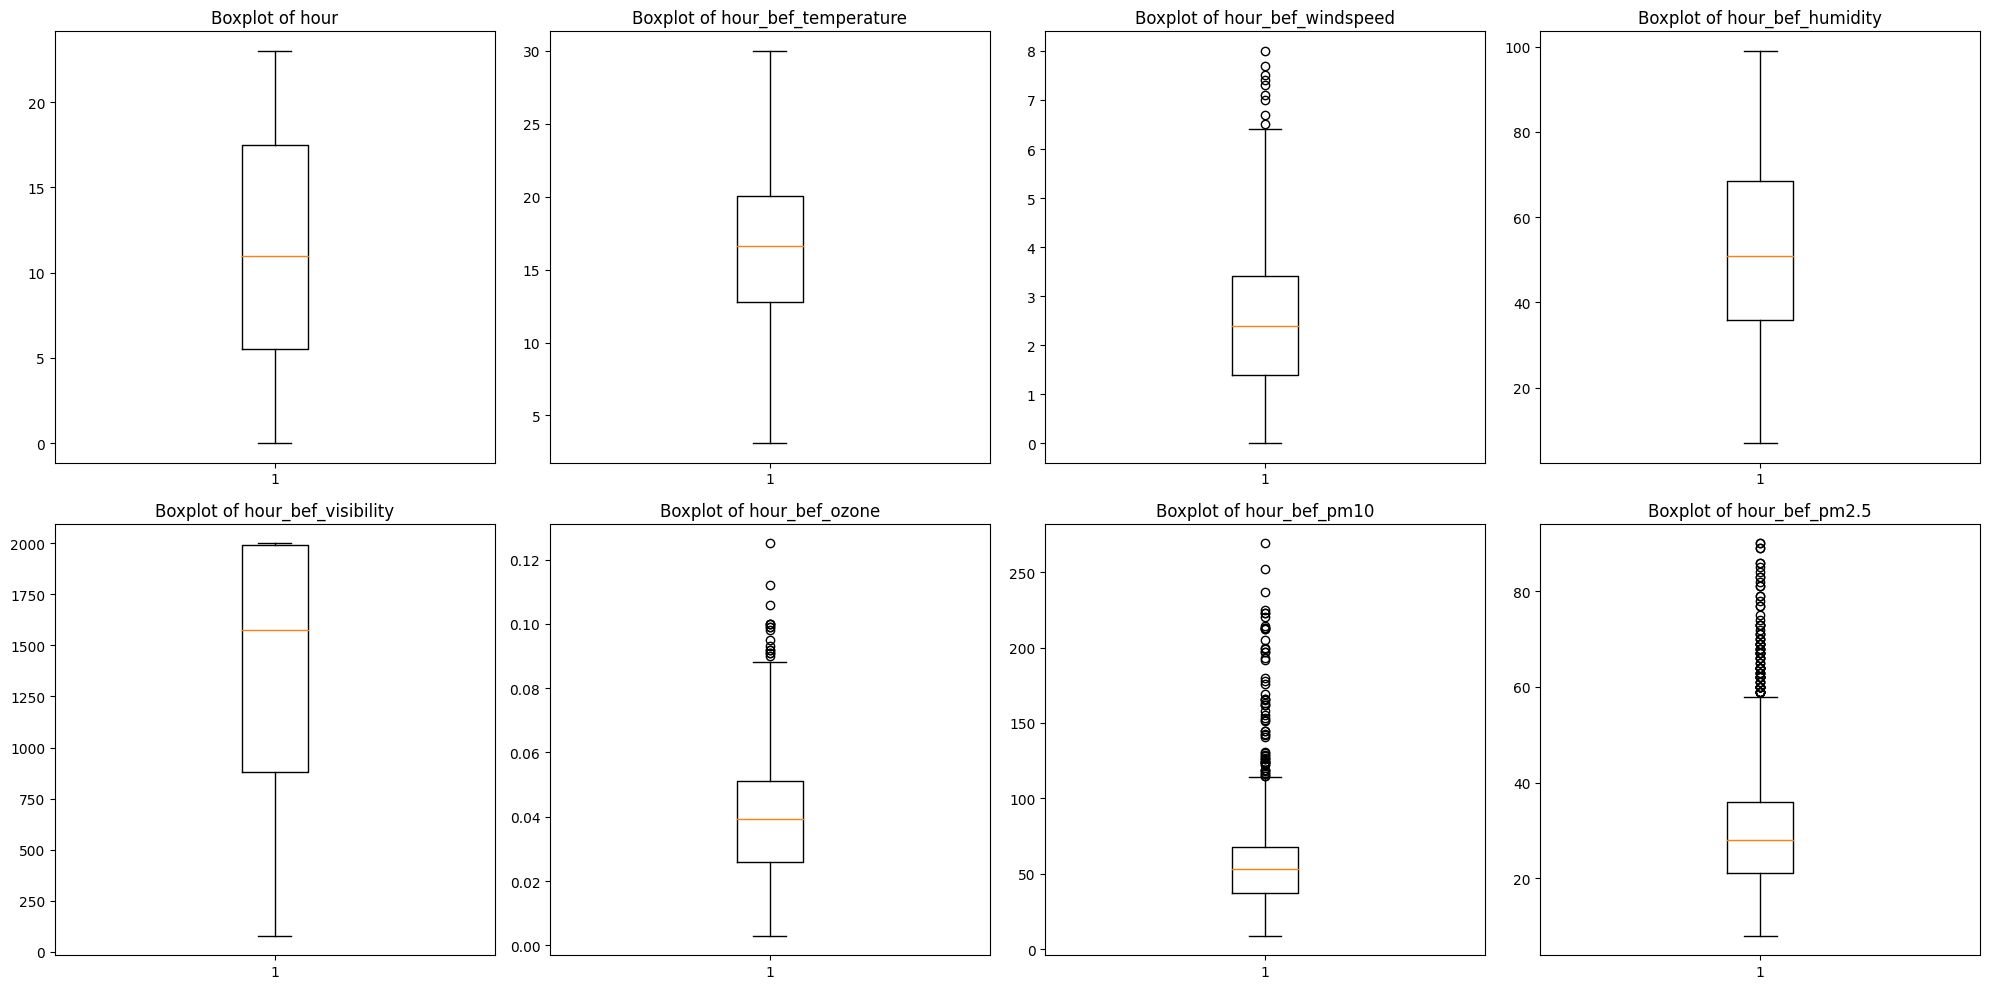

In [ ]:
# 결측 치 처리후 실행
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(train_copy.columns):
    plt.subplot(2,4, i + 1)
    plt.boxplot(train_copy[col])
    plt.title(f'Boxplot of {col}')
    # plt.set_xlabel('Column')
    # plt.set_ylabel('Value')

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

<Axes: xlabel='hour', ylabel='hour_bef_humidity'>

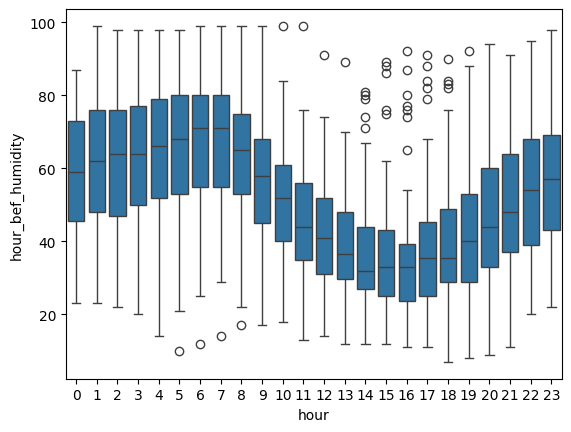

In [ ]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train_copy)

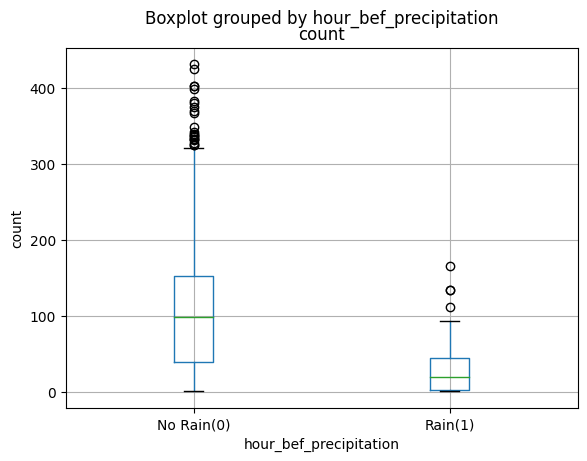

In [ ]:
df['hour_bef_precipitation'] = df['hour_bef_precipitation'].map({0.0:'No Rain(0)',1.0:'Rain(1)'})
y = "hour_bef_precipitation"
var = "count"
df.boxplot(column=var,by = y)
plt.ylabel(var)
plt.xlabel(y)
plt.show();

히트맵

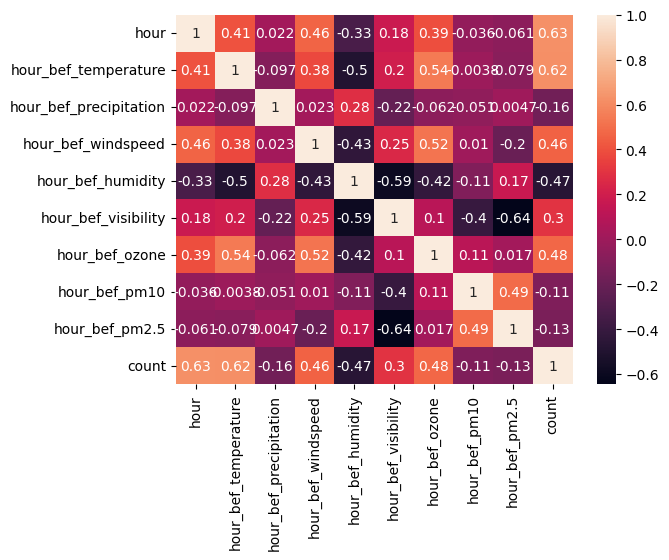

In [ ]:
corr = train.corr()
sns.heatmap(corr,annot=True);

히스토그램

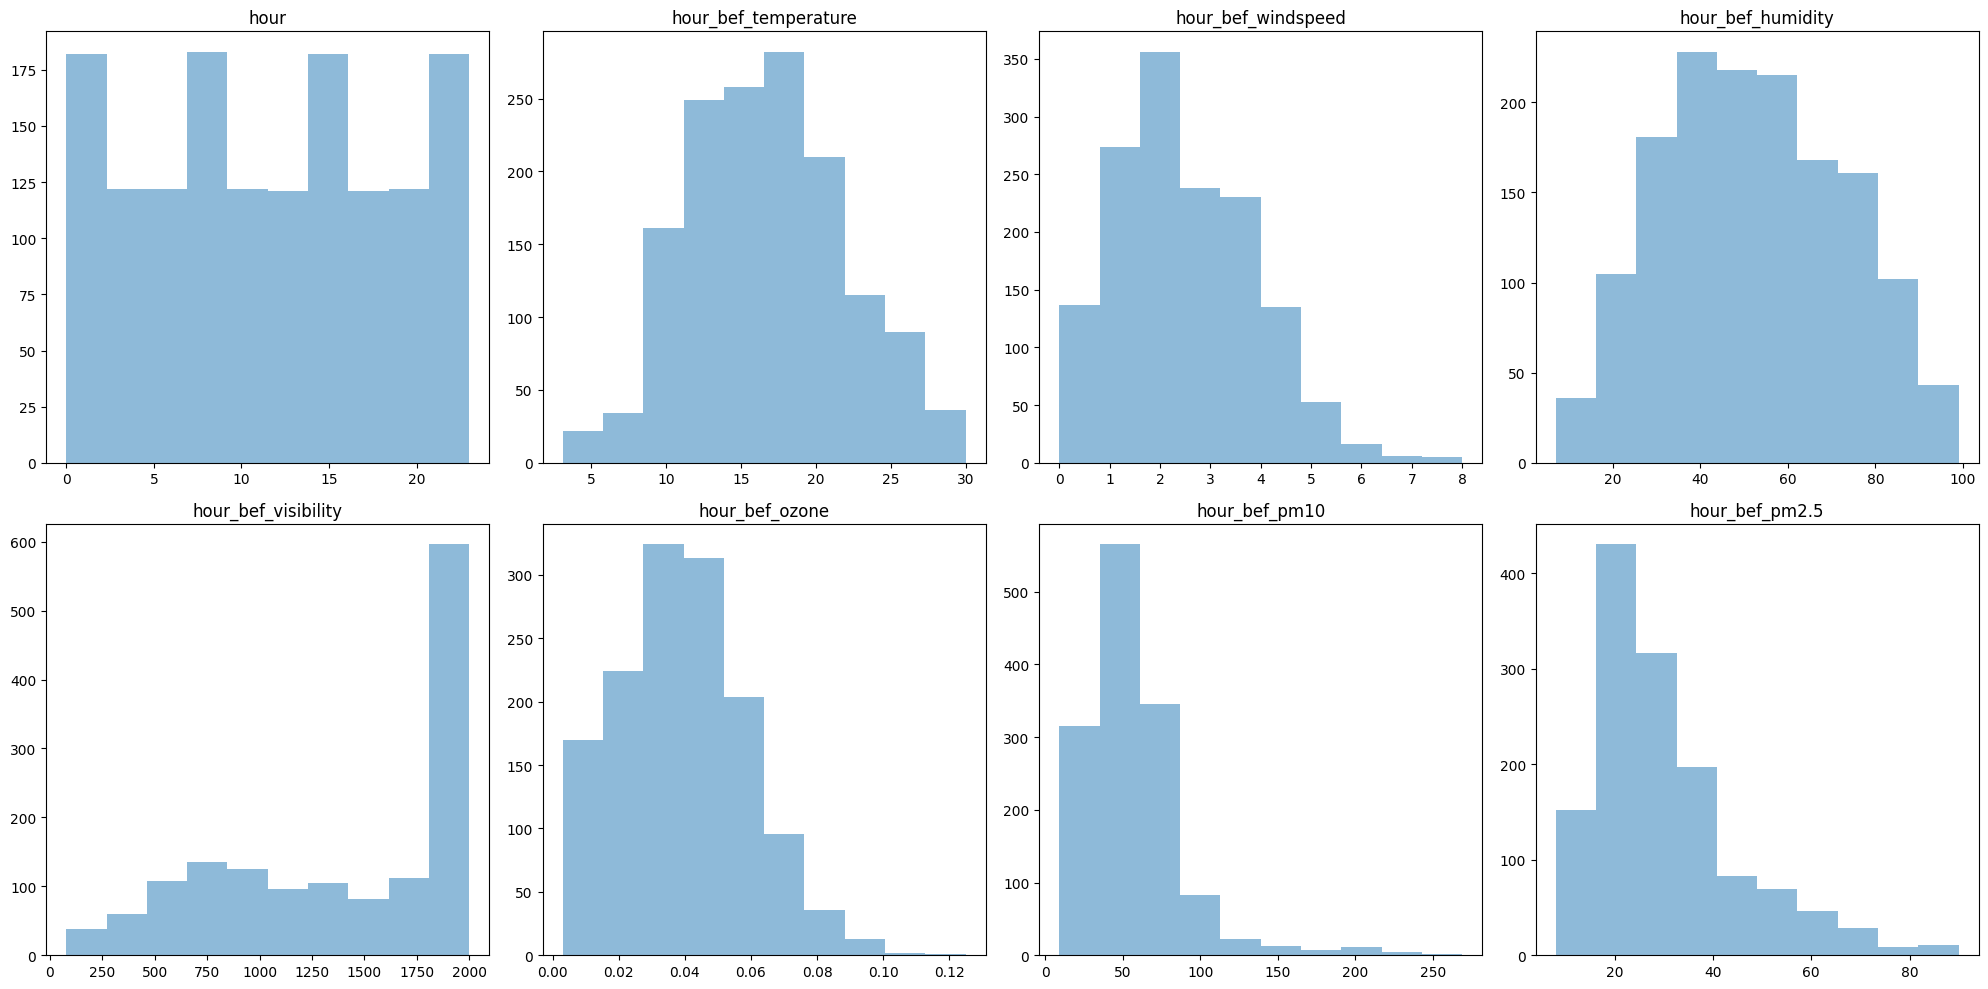

In [ ]:
# Subplot을 위한 figure와 axes 객체 생성
plt.figure(figsize=(20, 10))

# 각 컬럼에 대한 박스플롯 생성
for i, col in enumerate(train_copy.columns):
    plt.subplot(2,4, i + 1)
    plt.hist(train_copy[col],bins=10, alpha=0.5);
    plt.title(col)

# 그래프 간 간격 자동 조정
plt.tight_layout();

# 그래프 보여주기
plt.show();

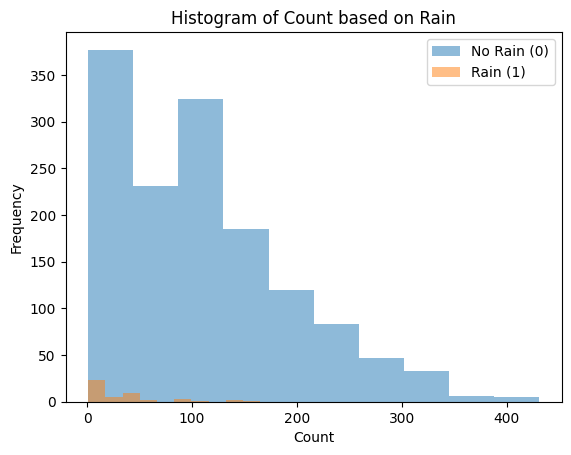

In [ ]:
# hour_bef_precipitation이 0인 데이터와 1인 데이터를 분리

rain_0 = [df['count'][i] for i in range(len(df['count'])) if df['hour_bef_precipitation'][i] == 'No Rain(0)']
rain_1 = [df['count'][i] for i in range(len(df['count'])) if df['hour_bef_precipitation'][i] == 'Rain(1)']

# 히스토그램 그리기
plt.hist(rain_0, bins=10, alpha=0.5, label='No Rain (0)')
plt.hist(rain_1, bins=10, alpha=0.5, label='Rain (1)')

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Count based on Rain')
plt.legend()
plt.show()

시간대별 사용자수

Text(16, 150, 'leave work')

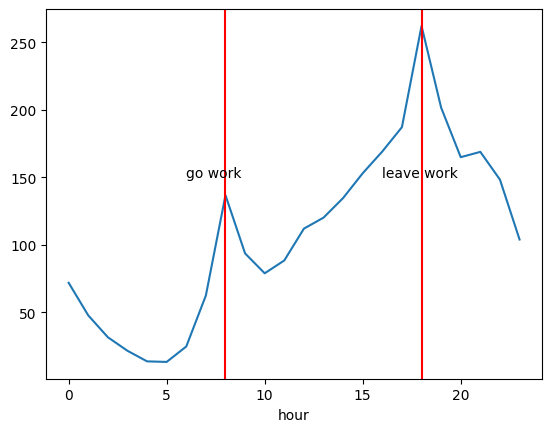

In [ ]:
# train_copy
train_copy = train.copy()
train_copy.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')

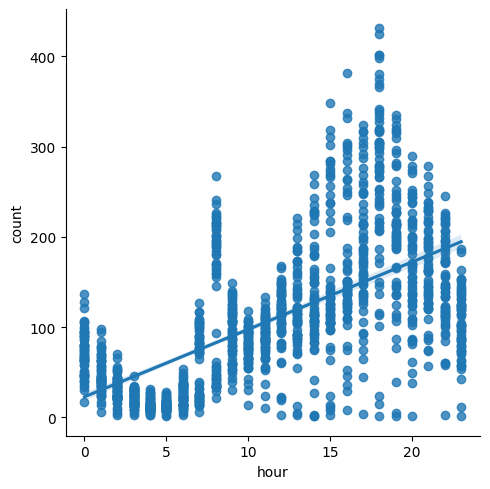

In [ ]:
sns.lmplot(x = 'hour', y = 'count', data = train_copy)

In [ ]:
pm=['hour_bef_pm10','hour_bef_pm2.5']

#정렬 순서
pm_order=[
    'good',
    'not bad',
    'bad',
    'very bad'
]
#미세먼지 수치에 매우 나쁨(very bad), 나쁨(bad), 보통(not bad), 좋음(good)으로 바꿉니다
for pm_i in pm:
  train_copy[pm_i] = train_copy[pm_i].apply(lambda x : 'very bad' if x >=76 else 'bad' if x>=36 else 'not bad' if x>=16 else 'good')

In [ ]:
#pm_order 순으로
pm_2 = train_copy['hour_bef_pm2.5'].value_counts()[pm_order]
pm_10 = train_copy['hour_bef_pm10'].value_counts()[pm_order]
print(pm_2)
print(pm_10)

hour_bef_pm2.5
good        233
not bad     850
bad         358
very bad     18
Name: count, dtype: int64
hour_bef_pm10
good         95
not bad     332
bad         779
very bad    253
Name: count, dtype: int64


In [ ]:
#미세먼지나쁜 순서대로 따릉이 사용량 구하기 0은 미세먼지 1은 초미세먼지

pm10_total=pd.DataFrame()
pm2_total=pd.DataFrame()


for pm_i in pm:
  for col in pm_order:
    if pm_i=='hour_bef_pm10':
      pm10_total[str(col)]=[int(train_copy[train_copy[pm_i]==col]['count'].sum())]
    else:
      pm2_total[str(col)]=[int(train_copy[train_copy[pm_i]==col]['count'].sum())]
pm2_total=pm2_total.transpose()[0][pm_order]
pm10_total=pm10_total.transpose()[0][pm_order]

미세먼지

<ipython-input-66-3b2e33c038e3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(pm2_total.index[i], pm2_total[i], width=0.60,
<ipython-input-66-3b2e33c038e3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pm2_total.index, fontfamily='serif')


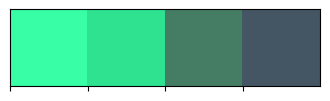

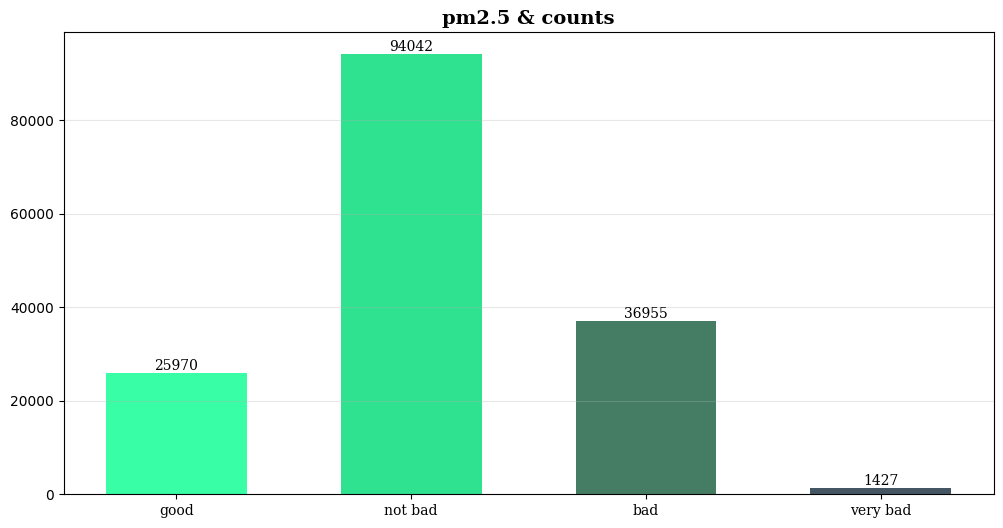

In [ ]:
#따릉이 색깔
sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
original_color=['#38FFA5','#2FE290','#447D64', '#445664']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
for i,color in enumerate(original_color):
  ax.bar(pm2_total.index[i], pm2_total[i], width=0.60,
        color=color)

for i in pm2_total.index:
    ax.annotate(f"{pm2_total[i]}",
                   xy=(i, pm2_total[i]+1500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(pm2_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.set_title('pm2.5 & counts',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show();

<ipython-input-57-2cb11a7ea617>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(pm10_total.index[i], pm10_total[i], width=0.60,
<ipython-input-57-2cb11a7ea617>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pm10_total.index, fontfamily='serif')


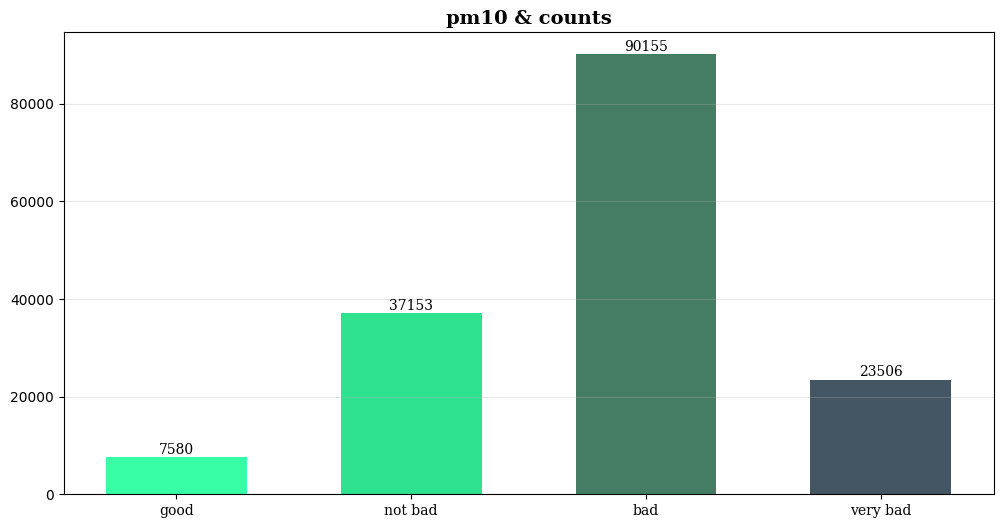

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

for i,color in enumerate(original_color):
  ax.bar(pm10_total.index[i], pm10_total[i], width=0.60,
        color=color)

for i in pm10_total.index:
    ax.annotate(f"{pm10_total[i]}",
                   xy=(i, pm10_total[i]+1500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize=10,
                   color='black')

ax.set_xticklabels(pm10_total.index, fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.3)
ax.set_title('pm10 & counts',fontsize=14,fontweight='bold',fontfamily='serif')
plt.show()

비에 관한 사용자수

In [ ]:
rain_1=train_copy[train_copy['hour_bef_precipitation']==1.0]['hour_bef_precipitation'].count()
rain_0=train_copy[train_copy['hour_bef_precipitation']==0.0]['hour_bef_precipitation'].count()

In [ ]:
#시간대별 따릉이 이용수
rain_total=pd.DataFrame()
states=['clean','rainy']
total=0
for i,state in enumerate(states):
  if i==0:
    total+=int((train_copy[train_copy['hour_bef_precipitation']==i]['count']).sum())/rain_0
  else:
    total+=int((train_copy[train_copy['hour_bef_precipitation']==i]['count']).sum())/rain_1
for i,state in enumerate(states):
  if i==0:
    rain_total[str(state)]=[round((int((train_copy[train_copy['hour_bef_precipitation']==i]['count']).sum())/rain_0)/total,1)]
  else:
    rain_total[str(state)]=[round((int((train_copy[train_copy['hour_bef_precipitation']==i]['count']).sum())/rain_1)/total,1)]

rain_total=rain_total.transpose()[0]

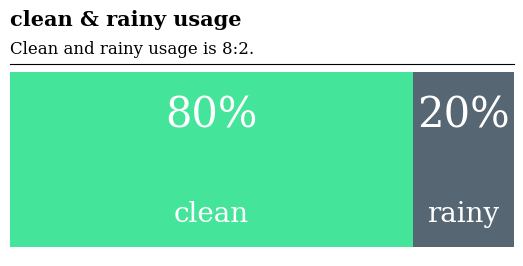

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(0.7, rain_total['clean'],
        color=original_color[1], alpha=0.9, label='clean')
ax.barh(0.7, rain_total['rainy'], left=rain_total['clean'],
        color=original_color[-1], alpha=0.9, label='rainy')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(rain_total.index, fontfamily='serif', fontsize=11)


# clean percentage
ax.annotate(f"{int(rain_total['clean']*100)}%",
                   xy=(rain_total['clean']/2,0.9),
                   va = 'center', ha='center',fontsize=30,
                   fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate("clean",
                   xy=(rain_total['clean']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')


ax.annotate(f"{int(rain_total['rainy']*100)}%",
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.9),
                   va = 'center', ha='center',fontsize=30
                   , fontweight='light', fontfamily='serif',
                   color='white')
ax.annotate("rainy",
                   xy=(rain_total['clean']+rain_total['rainy']/2, 0.45),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'clean & rainy usage', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Clean and rainy usage is 8:2.',fontfamily='serif',fontsize=12)

for s in [
  'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

## 전처리

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝 수업/따릉이/submission.csv')

In [3]:
# id값 처리
train = train.drop('id',axis=1)
test_id = test.pop('id')

**결측값처리**

In [4]:
train.isnull().sum()

,0
hour,0
hour_bef_temperature,2
hour_bef_precipitation,2
hour_bef_windspeed,9
hour_bef_humidity,2
hour_bef_visibility,2
hour_bef_ozone,76
hour_bef_pm10,90
hour_bef_pm2.5,117
count,0


In [5]:
test.isnull().sum()

,0
hour,0
hour_bef_temperature,1
hour_bef_precipitation,1
hour_bef_windspeed,1
hour_bef_humidity,1
hour_bef_visibility,1
hour_bef_ozone,35
hour_bef_pm10,37
hour_bef_pm2.5,36


**Iterative Imputer**

데이터 전처리 과정에서 Iterative Imputer를 사용하면, 결측값이 있는 데이터를 효율적으로 처리할 수 있습니다. Iterative Imputer는 피처 간의 상관관계를 활용하여 결측값을 예측하므로, 특히 피처 간 상관관계가 높은 데이터셋에서 유용합니다.

 **Iterative Imputer의 장점**

* 더 나은 예측 성능: 피처들 간의 상관관계를 고려하여 결측값을 예측하기 때문에 단순한 평균이나 중앙값 대체보다 더 정확한 값을 제공할 수 있습니다.
* 다양한 모델 사용 가능: BayesianRidge 외에도 결정 트리, 랜덤 포레스트 등 다양한 회귀 모델을 사용할 수 있어 데이터 특성에 맞춘 유연한 결측값 처리 가능.
* 다중 대체 가능성: 반복적 과정에서 여러 번의 예측값을 생성하므로, 다중 대체 방식으로 불확실성을 고려한 분석이 가능합니다.

**Iterative Imputer의 단점**

* 계산 비용: 반복적으로 모델을 학습하고 예측해야 하므로, 대규모 데이터셋에서는 시간이 많이 소요될 수 있습니다.
* 복잡성: 알고리즘이 단순한 대체법보다 복잡하기 때문에 이해하고 설정하는 데 더 많은 노력이 필요합니다.
* 모델 편향: 잘못된 모델을 선택하면 결측치 대체가 잘못될 수 있습니다. 따라서 데이터에 적합한 모델을 선택하는 것이 중요합니다.

In [6]:
# 결측값 처리
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer를 사용하기 위해 필요
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
target = train.pop('count')
for col in train.columns:
    train[col] = imputer.fit_transform(train[[col]])
    test[col] = imputer.transform(test[[col]])

In [7]:
train.isnull().sum()

,0
hour,0
hour_bef_temperature,0
hour_bef_precipitation,0
hour_bef_windspeed,0
hour_bef_humidity,0
hour_bef_visibility,0
hour_bef_ozone,0
hour_bef_pm10,0
hour_bef_pm2.5,0


In [8]:
test.isnull().sum()

,0
hour,0
hour_bef_temperature,0
hour_bef_precipitation,0
hour_bef_windspeed,0
hour_bef_humidity,0
hour_bef_visibility,0
hour_bef_ozone,0
hour_bef_pm10,0
hour_bef_pm2.5,0


hour_bef_visibility 컬럼은 왜도 가 매우 높은 관계로 삭제

In [9]:
train = train.drop('hour_bef_visibility',axis=1)

In [10]:
test = test.drop('hour_bef_visibility',axis=1)

이상치 처리


In [ ]:
# winsorize
from scipy.stats.mstats import winsorize
train['hour_bef_temperature'] = winsorize(train['hour_bef_temperature'], limits=[0.01, 0.01])

In [40]:
cols = train.columns
cols

Index(['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [11]:
# IQR
train['count'] = target
for col in train.columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    train_iqr = train[(train[col]<lower)|(train[col]>upper)]
    train = train.drop(train_iqr.index,axis=0)

In [ ]:
# StandatdScaler
cols = ['hour_bef_ozone','hour_bef_windspeed','hour_bef_pm10','hour_bef_pm2.5']
from sklearn.preprocessing import StandardScaler
for col in cols:
    scaler = StandardScaler()
    train[[col]] = scaler.fit_transform(train[[col]])
    test[[col]] = scaler.transform(test[[col]])

In [ ]:
# train = train.drop('hour_bef_pm2.5',axis=1)

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [ ]:
# StandatdScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

변수 추가

In [26]:
# 새로운 특징 추가하기: 비오는 날 여부와 미세먼지 많은 날 여부
train['is_rainy'] = (train['hour_bef_precipitation'] > 0).astype(int)
train['is_high_pm10'] = (train['hour_bef_pm10'] > 50).astype(int)
train['is_high_pm2_5'] = (train['hour_bef_pm2.5'] > 25).astype(int)

In [ ]:
# 새로운 특징 추가하기: 비오는 날 여부와 미세먼지 많은 날 여부
test['is_rainy'] = (test['hour_bef_precipitation'] > 0).astype(int)
test['is_high_pm10'] = (test['hour_bef_pm10'] > 50).astype(int)
test['is_high_pm2_5'] = (test['hour_bef_pm2.5'] > 25).astype(int)

In [12]:
# 출퇴근 시간 분류
def busyhour(hour):
    if (6<hour<10) or (16<hour<20):
        return 1
    else:
        return 0

train['busyhour'] = train['hour'].apply(busyhour)
test['busyhour'] = test['hour'].apply(busyhour)

In [13]:
target = train.pop('count')

In [82]:
train.shape, test.shape, target.shape

((1233, 9), (715, 9), (1233,))

target 값

In [45]:
target = train.pop('count')

In [14]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(train, target, test_size=0.2, random_state=110)
x_tr.shape,x_val.shape,y_tr.shape,y_val.shape

((986, 9), (247, 9), (986,), (247,))

## 모델 예측및 평가

In [15]:
# 평가 라이브러리 및 함수
from sklearn.metrics import mean_squared_error
def rmse(y_val,pred):
    return mean_squared_error(y_val,pred)**0.5

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)
pred = lr.predict(x_val)

print(rmse(y_val, pred))


43.51417799033894


In [17]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_tr,y_tr)
pred = log.predict(x_val)


# 평가
print(rmse(y_val, pred))

63.43392111621461


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=2023)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_val)

print(rmse(y_val, pred))

36.73478424655903


In [21]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_tr,y_tr)
pred = lgbm.predict(x_val)

print(rmse(y_val, pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 986, number of used features: 8
[LightGBM] [Info] Start training from score 109.134888
37.26970935899319


In [ ]:
!pip install xgboost

39.53703830239874


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x600 with 0 Axes>

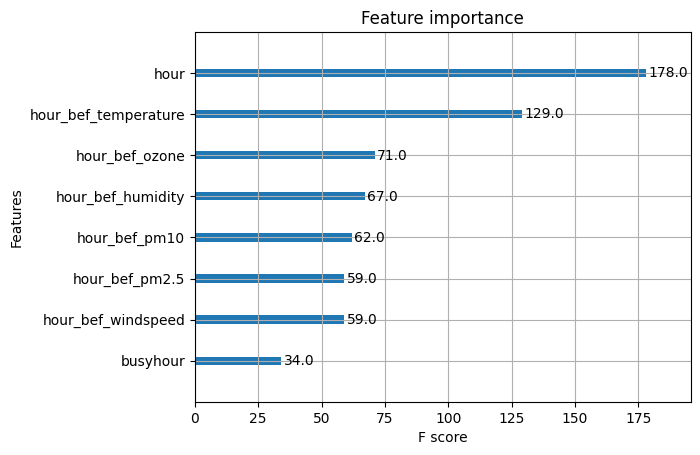

In [22]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, objective='reg:squarederror',random_state=110)
xgb.fit(x_tr,y_tr)
pred = xgb.predict(x_val)

print(rmse(y_val, pred))

import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.figure(figsize=(10, 6))
plot_importance(xgb)

In [85]:
x_tr['hour'] = x_tr['hour']**5
x_tr['hour_bef_temperature'] = x_tr['hour_bef_temperature']**4
xgb.fit(x_tr,y_tr)
pred = xgb.predict(x_val)

print(rmse(y_val, pred))

110.10098671462883


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# RandomForest 회귀 모델
# 랜덤 포레스트 회귀 모델 정의
model = RandomForestRegressor(random_state=2023)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 3,6,9,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=2)

# 데이터로 GridSearchCV 실행
grid_search.fit(x_tr,y_tr)

# 최적의 파라미터와 성능 확인
print("최적의 파라미터:", grid_search.best_params_)
print("최적의 RMSE:", (-grid_search.best_score_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
최적의 파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최적의 RMSE: 38.59757528356427


In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300,
                           min_samples_leaf = 1,
                           min_samples_split=2,
                           max_depth=15,
                           bootstrap = True,
                           random_state=2023)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_val)

print(rmse(y_val, pred))

120.25768365677503


In [91]:
feature_importances = rf.feature_importances_
feature_importances


NameError: name 'rf' is not defined

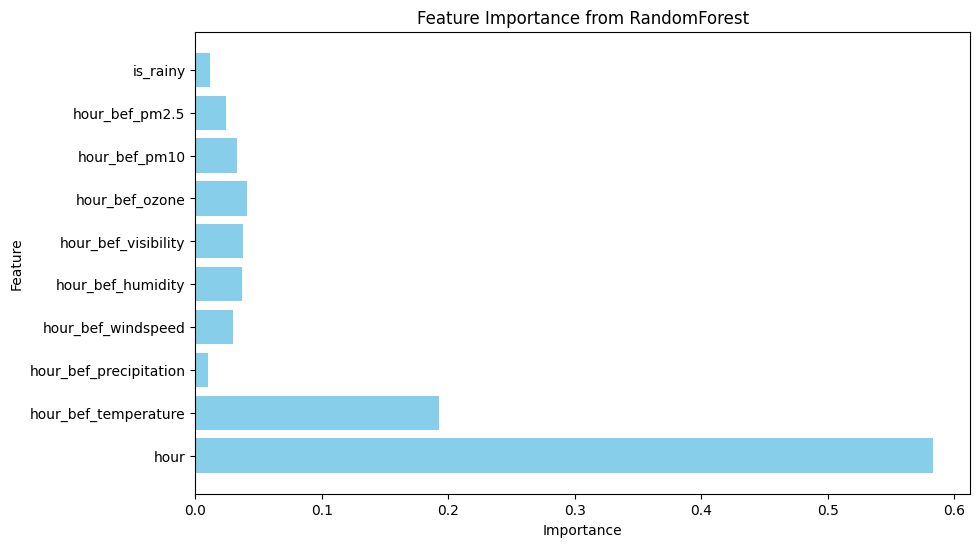

In [ ]:
# 6. 변수 중요도 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(train.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.show()

In [92]:
feature_importances = xgb.feature_importances_
feature_importances

x_tr = x_tr*feature_importances*10
xgb.fit(x_tr,y_tr)
pred = xgb.predict(x_val)

print(rmse(y_val,pred))

138.78899383556868


In [99]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=0)

In [100]:
weighted_X_train = X_train * feature_importances
rf.fit(weighted_X_train, y_train)
weighted_X_test = X_test * feature_importances
pred = rf.predict(weighted_X_test)

print(rmse(y_test, pred))

33.30963916255021


In [ ]:
# import numpy as np
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, mean_squared_error

# # RMSE를 정의하고 make_scorer로 변환
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# rmse_scorer = make_scorer(rmse, greater_is_better=False)

# # LightGBM 회귀 모델 정의
# model = LGBMRegressor(random_state=42)

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'max_depth': [-1, 5, 10, 15, 20],
#     'num_leaves': [20, 31, 40, 50, 60],
#     'min_child_samples': [5, 10, 20, 30, 40],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
# }

# # GridSearchCV 설정
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=rmse_scorer, cv=5, n_jobs=-1, verbose=2)

# # 데이터로 GridSearchCV 실행
# grid_search.fit(x_tr, y_tr)

# # 최적의 파라미터와 성능 확인
# print("최적의 파라미터:", grid_search.best_params_)
# print("최적의 RMSE:", -grid_search.best_score_)

In [27]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(x_tr,y_tr)

pred = gb.predict(x_val)
print(rmse(y_val, pred))

40.25310393630883


In [28]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50, random_state=110)
ada.fit(x_tr,y_tr)

pred = ada.predict(x_val)
print(rmse(y_val, pred))

42.910450714795125


In [29]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
dtc.fit(x_tr, y_tr)
pred = dtc.predict(x_val)
print(rmse(y_val, pred))

44.42039759734831


In [30]:
# Bagging
from sklearn.ensemble import BaggingRegressor
base_model = RandomForestRegressor()
bag = BaggingRegressor(estimator=base_model,
                          n_estimators=300,
                          bootstrap=True,
                          n_jobs=-1,
                          random_state=110)
bag.fit(x_tr,y_tr)
pred = bag.predict(x_val)
print(rmse(y_val, pred))

36.89213319680365


In [ ]:
test.head()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,is_rainy,is_high_pm10,is_high_pm2_5
0,7.0,20.7,1.3,62.0,0.041,0,0,1
1,17.0,30.0,5.4,33.0,0.061,0,0,1
2,13.0,19.0,2.1,95.0,0.020,1,0,1
3,6.0,22.5,2.5,60.0,0.027,0,1,1
4,22.0,14.6,3.4,93.0,0.041,1,0,0


In [34]:
rf = RandomForestRegressor(n_estimators=507,
                           max_depth=14,
                           min_samples_split=2,
                           min_samples_leaf=1)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_val)

rmse(y_val,pred)

36.96206771584308

,Description,Value
0,Session id,893
1,Target,count
2,Target type,Regression
3,Original data shape,"(1233, 10)"
4,Transformed data shape,"(1233, 10)"
5,Transformed train set shape,"(986, 10)"
6,Transformed test set shape,"(247, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,24.8809,1311.9799,36.0890,0.7854,0.4199,0.4279,0.2980
lightgbm,Light Gradient Boosting Machine,25.0643,1352.7758,36.4861,0.7790,0.4352,0.4280,0.6140
xgboost,Extreme Gradient Boosting,25.0877,1368.9240,36.8784,0.7765,0.4298,0.3977,0.1380
rf,Random Forest Regressor,25.7269,1397.5426,37.2067,0.7719,0.4219,0.4304,0.6810
gbr,Gradient Boosting Regressor,26.1621,1457.4649,37.9752,0.7610,0.4435,0.4595,0.1620
lr,Linear Regression,34.8424,2084.7624,45.5594,0.6580,0.6589,0.7345,1.2760
lar,Least Angle Regression,34.8424,2084.7616,45.5594,0.6580,0.6589,0.7345,0.0380
ada,AdaBoost Regressor,36.5918,2089.0494,45.6302,0.6574,0.6355,0.8761,0.1370
ridge,Ridge Regression,35.0168,2097.7645,45.7067,0.6561,0.6602,0.7274,0.0470
br,Bayesian Ridge,35.0672,2103.3408,45.7665,0.6553,0.6631,0.7275,0.0290


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=507,
                        max_depth=14,
                        min_samples_split=2,
                        min_samples_leaf=1)
et.fit(x_tr, y_tr)
pred = et.predict(x_val)

rmse(y_val,pred)

35.173313435900006

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

et_model = ExtraTreesRegressor(random_state=0)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [ 200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# 6. GridSearchCV 모델 학습
grid_search.fit(x_tr, y_tr)


print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best RMSE Score: 36.74360880095165


In [55]:
best_et_model = grid_search.best_estimator_
y_pred = best_et_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Test Set RMSE: {rmse:.4f}")

Test Set RMSE: 34.2425


In [57]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.9 MB/s eta 0:00:00


In [65]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # 'auto' 제거 및 'None' 추가
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Extra Trees Regressor 모델 정의
    model = ExtraTreesRegressor(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )

    # 모델 학습
    model.fit(x_tr, y_tr)

    # 예측 및 RMSE 계산
    y_pred = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse

In [66]:
# 6. Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='minimize')  # RMSE를 최소화하는 방향으로 최적화
study.optimize(objective, n_trials=50)  # 50번의 시도 진행

# 최적의 파라미터와 점수 출력
print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value:.4f}")
print("  Best hyperparameters: ", trial.params)

# 7. 최적의 하이퍼파라미터로 모델 학습 및 평가
best_params = trial.params
best_model = ExtraTreesRegressor(**best_params, random_state=0)
best_model.fit(x_tr, y_tr)
y_pred = best_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Test Set RMSE with best parameters: {rmse:.4f}")

[I 2024-09-01 06:11:24,174] A new study created in memory with name: no-name-f69d33a1-1d2d-42c4-8b0e-0b32f7cc2f63
[I 2024-09-01 06:11:24,983] Trial 0 finished with value: 40.227743442945425 and parameters: {'n_estimators': 226, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 0 with value: 40.227743442945425.
[I 2024-09-01 06:11:25,603] Trial 1 finished with value: 39.595266184688256 and parameters: {'n_estimators': 143, 'max_features': 'log2', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 39.595266184688256.
[I 2024-09-01 06:11:26,624] Trial 2 finished with value: 36.45878561471424 and parameters: {'n_estimators': 218, 'max_features': 'log2', 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 2 with value: 36.45878561471424.
[I 2024-09-01 06:11:27,242] Trial 3 finished with value: 37.2406961644102 and parameters: {'n_estimators': 272, 'max_features': 'sqrt

Best trial:
  RMSE: 35.0767
  Best hyperparameters:  {'n_estimators': 205, 'max_features': None, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 1}
Test Set RMSE with best parameters: 35.0767


In [67]:
best_params = trial.params
best_model = ExtraTreesRegressor(**best_params, random_state=0)
best_model.fit(x_tr, y_tr)

ExtraTreesRegressor(max_depth=14, max_features=None, min_samples_split=6,
                    n_estimators=205, random_state=0)

In [69]:
# 6. Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='minimize')  # RMSE를 최소화하는 방향으로 최적화
study.optimize(objective, n_trials=50)  # 50번의 시도 진행

# 최적의 파라미터와 점수 출력
print("Best trial:")
trial = study.best_trial
print(f"  RMSE: {trial.value:.4f}")
print("  Best hyperparameters: ", trial.params)

# 7. 최적의 하이퍼파라미터로 모델 학습 및 평가
best_params = trial.params
best_model = RandomForestRegressor(**best_params, random_state=0)
best_model.fit(x_tr, y_tr)
y_pred = best_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Test Set RMSE with best parameters: {rmse:.4f}")

[I 2024-09-01 06:16:55,435] A new study created in memory with name: no-name-568635d0-5aa7-4e10-a35c-c86c1de7d4f5
[I 2024-09-01 06:16:56,636] Trial 0 finished with value: 36.82915778364898 and parameters: {'n_estimators': 202, 'max_features': None, 'max_depth': 21, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 0 with value: 36.82915778364898.
[I 2024-09-01 06:16:57,799] Trial 1 finished with value: 38.010763220386366 and parameters: {'n_estimators': 254, 'max_features': None, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 36.82915778364898.
[I 2024-09-01 06:16:58,337] Trial 2 finished with value: 37.02832484297528 and parameters: {'n_estimators': 165, 'max_features': None, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 0 with value: 36.82915778364898.
[I 2024-09-01 06:16:58,899] Trial 3 finished with value: 41.68083357967212 and parameters: {'n_estimators': 263, 'max_features': 'sqrt', 'max_

Best trial:
  RMSE: 35.2152
  Best hyperparameters:  {'n_estimators': 249, 'max_features': 'sqrt', 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 1}
Test Set RMSE with best parameters: 37.1109


In [70]:
pred = best_model.predict(test)
pd.DataFrame({'id':test_id, 'count':pred}).to_csv('submission.csv',index=False)

In [56]:
pred = best_et_model.predict(test)
pd.DataFrame({'id':test_id, 'count':pred}).to_csv('submission.csv',index=False)

In [20]:
train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,busyhour
1,13.0,20.1,0.0,1.4,48.0,0.042,73.0,40.0,0
2,6.0,13.9,0.0,0.7,79.0,0.033,32.0,19.0,0
5,2.0,13.6,0.0,1.7,80.0,0.027,34.0,15.0,0
6,3.0,10.6,0.0,1.5,58.0,0.038,62.0,33.0,0
7,21.0,16.0,0.0,6.0,21.0,0.050,90.0,28.0,0
